# Week 3 Gemastik NLP

## Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import tensorflow as tf
from sklearn.metrics import cohen_kappa_score
import keras.backend as K


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Bidirectional, Embedding, Dropout, GlobalAveragePooling1D, Flatten, SpatialDropout1D

from tensorflow.keras.optimizers import AdamW
from sklearn.utils import shuffle

import keras

from sklearn.utils import class_weight
from sklearn.metrics import f1_score

import keras
from keras import ops
from keras import layers

# Set random seed for reproducibility
import random

seed = 2024
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Reading The Dataset

In [ ]:
df = pd.read_csv('/content/train.csv')

train_df = df.copy()
test_df = pd.read_csv('/content/test.csv')

In [ ]:
train_df.head(3)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Departement Name
0,823,NaN,So pretty but be careful,"I am 5'6"" and 140b, i'm usually a s and that i...",4,NaN,1.0,General Petite,Tops,Blouses,NaN
1,1094,50.0,Super flattering and comfortable,This dress is of great quality and design. the...,5,NaN,NaN,General,Dresses,NaN,NaN
2,251,67.0,Cozy and stylish,"I love this cardigan! its fit, however, really...",5,NaN,5.0,Initmates,Intimate,NaN,NaN


In [ ]:
test_df.head(3)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Departement Name
0,0,847,47.0,Flattering shirt,This shirt is very flattering to all due to th...,NaN,6.0,General,Tops,Blouses,NaN
1,1,858,NaN,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",NaN,NaN,General Petite,Tops,Knits,NaN
2,2,1120,32.0,Super cute and cozy,"A flattering, super cozy coat. will work well...",NaN,0.0,General,Jackets,Outerwear,NaN


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17614 entries, 0 to 17613
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Clothing ID              17614 non-null  int64  
 1   Age                      14068 non-null  float64
 2   Title                    14756 non-null  object 
 3   Review Text              16164 non-null  object 
 4   Rating                   17614 non-null  int64  
 5   Recommended IND          2659 non-null   float64
 6   Positive Feedback Count  10565 non-null  float64
 7   Division Name            14973 non-null  object 
 8   Department Name          17602 non-null  object 
 9   Class Name               13153 non-null  object 
 10  Departement Name         0 non-null      float64
dtypes: float64(4), int64(2), object(5)
memory usage: 1.5+ MB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               5872 non-null   int64  
 1   Clothing ID              5872 non-null   int64  
 2   Age                      4721 non-null   float64
 3   Title                    4920 non-null   object 
 4   Review Text              5357 non-null   object 
 5   Recommended IND          864 non-null    float64
 6   Positive Feedback Count  3527 non-null   float64
 7   Division Name            4976 non-null   object 
 8   Department Name          5870 non-null   object 
 9   Class Name               4451 non-null   object 
 10  Departement Name         0 non-null      float64
dtypes: float64(4), int64(2), object(5)
memory usage: 504.8+ KB


In [ ]:
train_df.isnull().sum(), train_df.isnull().sum() / len(train_df)

(Clothing ID                    0
 Age                         3546
 Title                       2858
 Review Text                 1450
 Rating                         0
 Recommended IND            14955
 Positive Feedback Count     7049
 Division Name               2641
 Department Name               12
 Class Name                  4461
 Departement Name           17614
 dtype: int64,
 Clothing ID                0.000000
 Age                        0.201317
 Title                      0.162257
 Review Text                0.082321
 Rating                     0.000000
 Recommended IND            0.849041
 Positive Feedback Count    0.400193
 Division Name              0.149938
 Department Name            0.000681
 Class Name                 0.253264
 Departement Name           1.000000
 dtype: float64)

In [ ]:
test_df.isnull().sum(), test_df.isnull().sum() / len(test_df)

(Unnamed: 0                    0
 Clothing ID                   0
 Age                        1151
 Title                       952
 Review Text                 515
 Recommended IND            5008
 Positive Feedback Count    2345
 Division Name               896
 Department Name               2
 Class Name                 1421
 Departement Name           5872
 dtype: int64,
 Unnamed: 0                 0.000000
 Clothing ID                0.000000
 Age                        0.196015
 Title                      0.162125
 Review Text                0.087704
 Recommended IND            0.852861
 Positive Feedback Count    0.399353
 Division Name              0.152589
 Department Name            0.000341
 Class Name                 0.241996
 Departement Name           1.000000
 dtype: float64)

In [ ]:
train_df.duplicated().sum()
train_df.drop_duplicates(inplace=True)

In [ ]:
test_df.duplicated().sum()

0

## Feature Creation

In [ ]:
# Mengisi nilai NaN dengan string kosong
train_df['Title'] = train_df['Title'].fillna('')
train_df['Review Text'] = train_df['Review Text'].fillna('')
test_df['Title'] = test_df['Title'].fillna('')
test_df['Review Text'] = test_df['Review Text'].fillna('')

# Menggabungkan kolom
train_df['Text'] = train_df['Title'] + '. ' + train_df['Review Text']
test_df['Text'] = test_df['Title'] + '. ' + test_df['Review Text']

In [ ]:
train_df

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Departement Name,Text
0,823,NaN,So pretty but be careful,"I am 5'6"" and 140b, i'm usually a s and that i...",4,NaN,1.0,General Petite,Tops,Blouses,NaN,"So pretty but be careful. I am 5'6"" and 140b, ..."
1,1094,50.0,Super flattering and comfortable,This dress is of great quality and design. the...,5,NaN,NaN,General,Dresses,NaN,NaN,Super flattering and comfortable. This dress i...
2,251,67.0,Cozy and stylish,"I love this cardigan! its fit, however, really...",5,NaN,5.0,Initmates,Intimate,NaN,NaN,Cozy and stylish. I love this cardigan! its fi...
3,1052,58.0,,The fabric is lovely and the straight leg cut ...,4,NaN,0.0,General Petite,Bottoms,Pants,NaN,. The fabric is lovely and the straight leg cu...
4,857,41.0,Great buy!,,5,NaN,0.0,General Petite,Tops,Knits,NaN,Great buy!.
...,...,...,...,...,...,...,...,...,...,...,...,...
17609,824,39.0,Petite all the way,"If you are on the shorter side, do with the pe...",5,1.0,0.0,General Petite,Tops,Blouses,NaN,Petite all the way. If you are on the shorter ...
17610,1078,35.0,Gorgeous dress,I purchased this in the black in an xl. i am t...,5,NaN,34.0,General,Dresses,Dresses,NaN,Gorgeous dress. I purchased this in the black ...
17611,1022,NaN,,These jeans look better in person - the patter...,5,NaN,0.0,General,Bottoms,NaN,NaN,. These jeans look better in person - the patt...
17612,1022,NaN,Ok if looking for a loose fit,Bought these for the color however these just ...,3,NaN,NaN,NaN,Bottoms,NaN,NaN,Ok if looking for a loose fit. Bought these fo...


## Data Cleaning

### Drop Irrelevant Column

In [ ]:
train_df = train_df[["Title","Review Text","Text", "Department Name", "Class Name", "Division Name", "Rating"]]
test_df = test_df[["Title","Review Text","Text", "Department Name", "Class Name", "Division Name"]]

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            5872 non-null   object
 1   Review Text      5872 non-null   object
 2   Text             5872 non-null   object
 3   Department Name  5870 non-null   object
 4   Class Name       4451 non-null   object
 5   Division Name    4976 non-null   object
dtypes: object(6)
memory usage: 275.4+ KB


In [ ]:
test_df.isnull().sum()

,0
Title,0
Review Text,0
Text,0
Department Name,2
Class Name,1421
Division Name,896


### Drop Missing Value

In [ ]:
train_df.dropna(inplace=True)
# test_df.dropna(inplace=True)

<ipython-input-497-0471fc6867bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.dropna(inplace=True)


In [ ]:
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# Fungsi untuk mendapatkan skor sentimen
def get_sentiment_scores(text):
    scores = analyzer.polarity_scores(text)
    return scores['neg'], scores['neu'], scores['pos'], scores['compound']

# Buat fitur baru untuk Title
train_df['Title_Negative'], train_df['Title_Neutral'], train_df['Title_Positive'], train_df['Title_Compound'] = zip(*train_df['Title'].apply(get_sentiment_scores))
test_df['Title_Negative'], test_df['Title_Neutral'], test_df['Title_Positive'], test_df['Title_Compound'] = zip(*test_df['Title'].apply(get_sentiment_scores))

# Buat fitur baru untuk Review Text
train_df['Review_Negative'], train_df['Review_Neutral'], train_df['Review_Positive'], train_df['Review_Compound'] = zip(*train_df['Review Text'].apply(get_sentiment_scores))
test_df['Review_Negative'], test_df['Review_Neutral'], test_df['Review_Positive'], test_df['Review_Compound'] = zip(*test_df['Review Text'].apply(get_sentiment_scores))

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
<ipython-input-498-3b7abfe9d781>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Title_Negative'], train_df['Title_Neutral'], train_df['Title_Positive'], train_df['Title_Compound'] = zip(*train_df['Title'].apply(get_sentiment_scores))
<ipython-input-498-3b7abfe9d781>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Title_Negative'], train_df['Title_Neutral'], 

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11183 entries, 0 to 17610
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            11183 non-null  object 
 1   Review Text      11183 non-null  object 
 2   Text             11183 non-null  object 
 3   Department Name  11183 non-null  object 
 4   Class Name       11183 non-null  object 
 5   Division Name    11183 non-null  object 
 6   Rating           11183 non-null  int64  
 7   Title_Negative   11183 non-null  float64
 8   Title_Neutral    11183 non-null  float64
 9   Title_Positive   11183 non-null  float64
 10  Title_Compound   11183 non-null  float64
 11  Review_Negative  11183 non-null  float64
 12  Review_Neutral   11183 non-null  float64
 13  Review_Positive  11183 non-null  float64
 14  Review_Compound  11183 non-null  float64
dtypes: float64(8), int64(1), object(6)
memory usage: 1.4+ MB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            5872 non-null   object 
 1   Review Text      5872 non-null   object 
 2   Text             5872 non-null   object 
 3   Department Name  5870 non-null   object 
 4   Class Name       4451 non-null   object 
 5   Division Name    4976 non-null   object 
 6   Title_Negative   5872 non-null   float64
 7   Title_Neutral    5872 non-null   float64
 8   Title_Positive   5872 non-null   float64
 9   Title_Compound   5872 non-null   float64
 10  Review_Negative  5872 non-null   float64
 11  Review_Neutral   5872 non-null   float64
 12  Review_Positive  5872 non-null   float64
 13  Review_Compound  5872 non-null   float64
dtypes: float64(8), object(6)
memory usage: 642.4+ KB


In [ ]:
train_df = train_df.drop(columns = ["Title", "Review Text","Department Name", "Class Name", "Division Name"])
test_df = test_df.drop(columns = ["Title", "Review Text","Department Name", "Class Name", "Division Name"])

### Text Cleaning

#### Defining Negation Word

In [ ]:
all_stopwords = stopwords.words('english')

# Kata-kata negasi yang ingin dihapus dari kumpulan stopwords
kata_negasi = ['not', 'no', 'never', 'none']

# Hapus kata-kata negasi dari kumpulan stopwords
stopwords = [word for word in all_stopwords if word not in kata_negasi]

In [ ]:
def preprocess_text(text):
    # Konversi teks ke huruf kecil
    text = text.lower()
    # Menghapus whitespace ekstra
    text = ' '.join(text.split())
    # # Menghapus stopwords yang sudah ditentukan
    # words = [word for word in text.split() if word not in stopwords]
    # Gabungkan kata-kata kembali menjadi satu string
    processed_text = ' '.join(text.split())

    return processed_text

train_df["Text"] = train_df["Text"].apply(preprocess_text)
test_df["Text"] = test_df["Text"].apply(preprocess_text)

In [ ]:
contraction_mapping = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how does",
    "I'd": "I had",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it had",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she had",
    "she'd've": "she would have",
    "she'll": "she she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that had",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there had",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they had",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
}

def expand_contractions(text, contraction_mapping):
    for contraction, expanded in contraction_mapping.items():
        text = text.replace(contraction, expanded)
    return text

train_df['Text'] = train_df['Text'].apply(lambda x: expand_contractions(x, contraction_mapping))
test_df['Text'] = test_df['Text'].apply(lambda x: expand_contractions(x, contraction_mapping))

In [ ]:
train_df.head(3)

,Text,Rating,Title_Negative,Title_Neutral,Title_Positive,Title_Compound,Review_Negative,Review_Neutral,Review_Positive,Review_Compound
0,"so pretty but be careful. i am 5'6"" and 140b, ...",4,0.0,0.420,0.580,0.4848,0.000,0.841,0.159,0.8885
3,. the fabric is lovely and the straight leg cu...,4,0.0,0.000,0.000,0.0000,0.075,0.573,0.351,0.8271
4,great buy!.,5,0.0,0.185,0.815,0.6588,0.000,0.000,0.000,0.0000


In [ ]:
test_df.head(3)

,Text,Title_Negative,Title_Neutral,Title_Positive,Title_Compound,Review_Negative,Review_Neutral,Review_Positive,Review_Compound
0,flattering shirt. this shirt is very flatterin...,0.0,0.303,0.697,0.3182,0.000,0.700,0.300,0.9291
1,"shimmer, surprisingly goes with lots. i ordere...",0.0,0.645,0.355,0.2960,0.046,0.901,0.053,-0.0909
2,"super cute and cozy. a flattering, super cozy ...",0.0,0.225,0.775,0.7845,0.000,0.620,0.380,0.9360


## EDA



### Defining Analysis Question

1.   Bagaimana Perbandingan Rating ?
2.   Bagaimana Perbandingan Panjang Teks Antar Rating ?
3.   Ada Berapa Jumlah Departement ?
4.   Bagaimana Perbandingan Rating Antar Departement
5.   Ada Berapa Jumlah Kelas ?
6.   Bagaimana Perbandingan Rating Antar Kelas ?
7.   Ada Berapa Jumlah Divisi ?
8.   Bagaimana Perbandingan Jumlah Divisi Antar Kelas ?
9.   Kata Apa Yang Paling Banyak Diucapkan Antar Rating ?

#### Visualisasi Perbandingan Rating

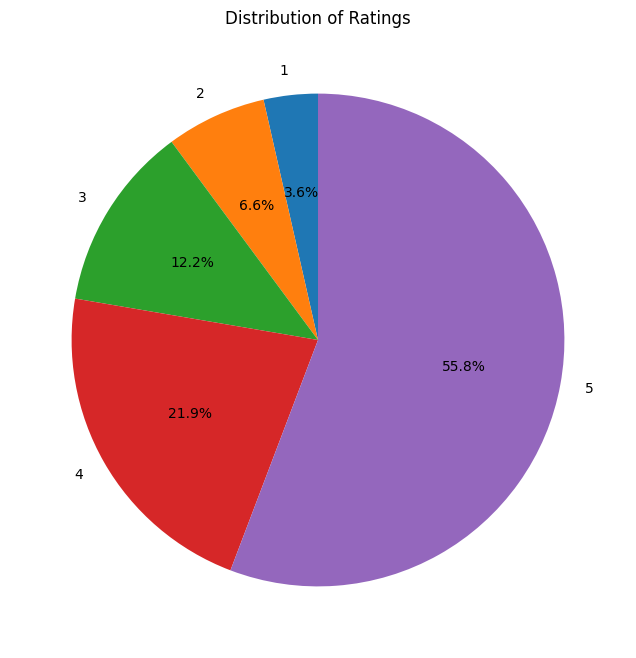

In [ ]:
rating_counts = train_df["Rating"].value_counts().sort_values()

plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Distribution of Ratings")
plt.show()

#### Visualisasi Perbandingan Panjang Teks Antar Rating

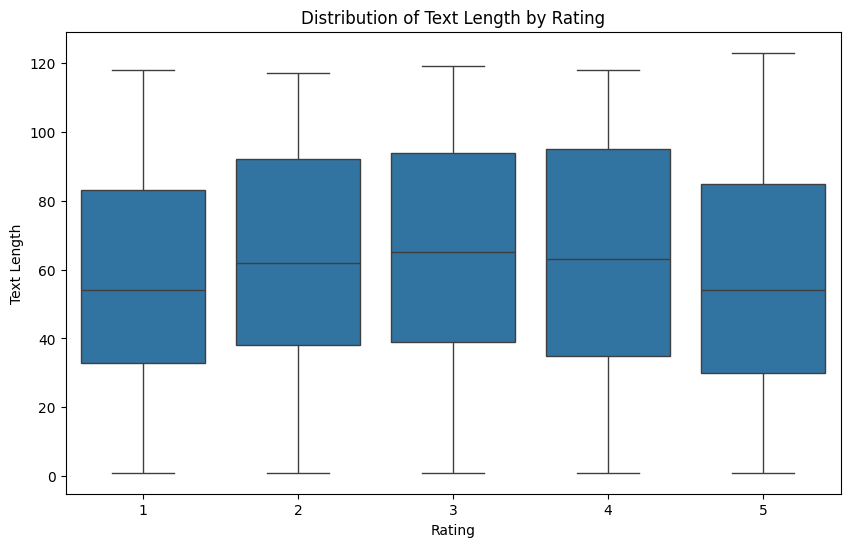

In [ ]:
train_df['Text Length'] = train_df['Text'].apply(lambda x: len(x.split()))
test_df['Text Length'] = test_df['Text'].apply(lambda x: len(x.split()))

## generate text length visualization using boxplot between rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rating', y='Text Length', data=train_df)
plt.title('Distribution of Text Length by Rating')
plt.show()

#### Visualisasi Jumlah Departement

In [ ]:
# department_counts = train_df["Department Name"].value_counts().sort_values(ascending = False)
# department_counts

# plt.figure(figsize=(10, 6))
# sns.barplot(x=department_counts.index, y=department_counts.values)
# plt.title('Distribution of Departments')
# plt.show()

#### Kata Apa Yang Paling Banyak Diucapkan Antar Rating ?

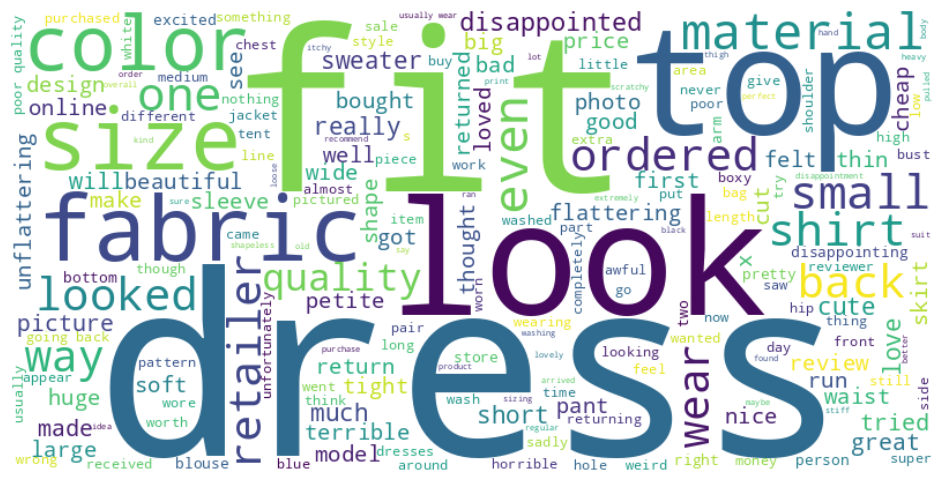

In [ ]:
from wordcloud import WordCloud

text = " ".join(train_df[train_df["Rating"] == 1]["Text"])

# Membuat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Menampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

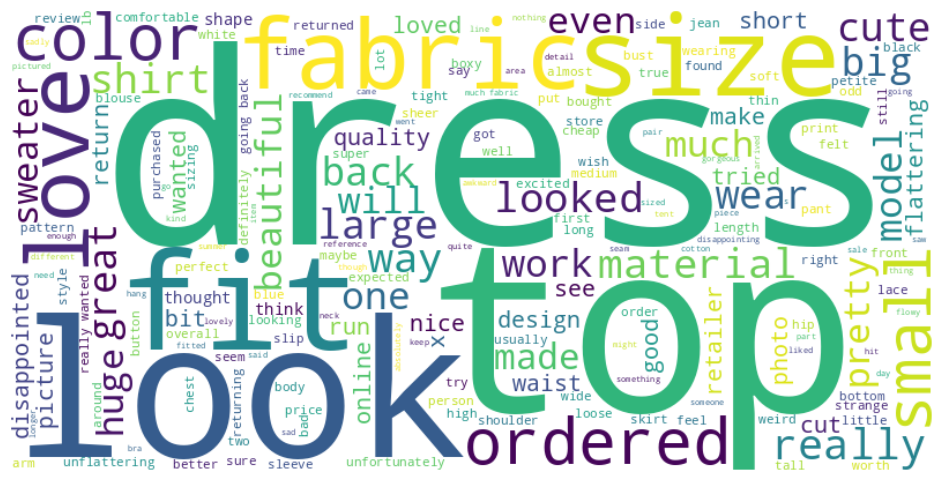

In [ ]:
from wordcloud import WordCloud

text = " ".join(train_df[train_df["Rating"] == 2]["Text"])

# Membuat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Menampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

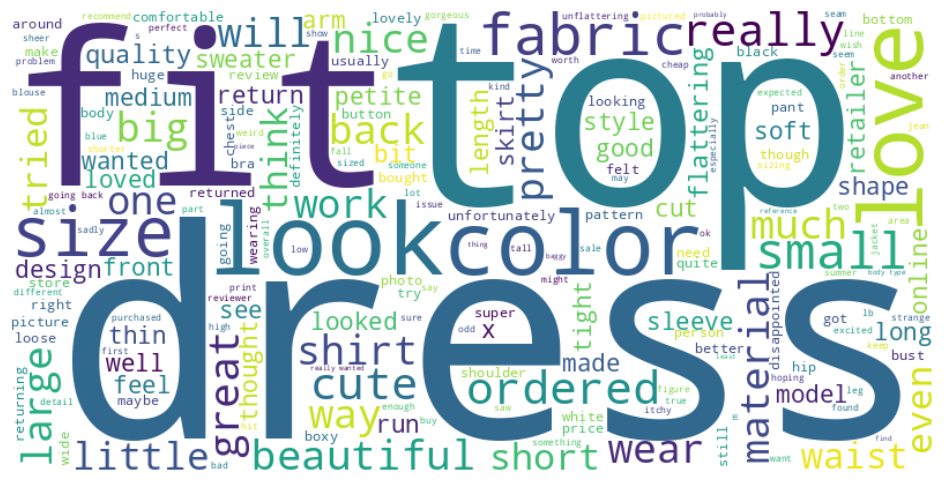

In [ ]:
from wordcloud import WordCloud

text = " ".join(train_df[train_df["Rating"] == 3]["Text"])

# Membuat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Menampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

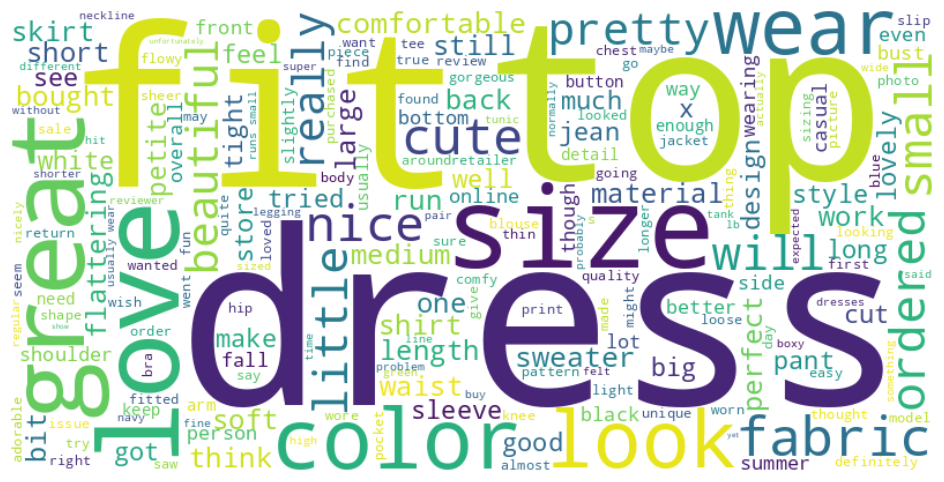

In [ ]:
from wordcloud import WordCloud

text = " ".join(train_df[train_df["Rating"] == 4]["Text"])

# Membuat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Menampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

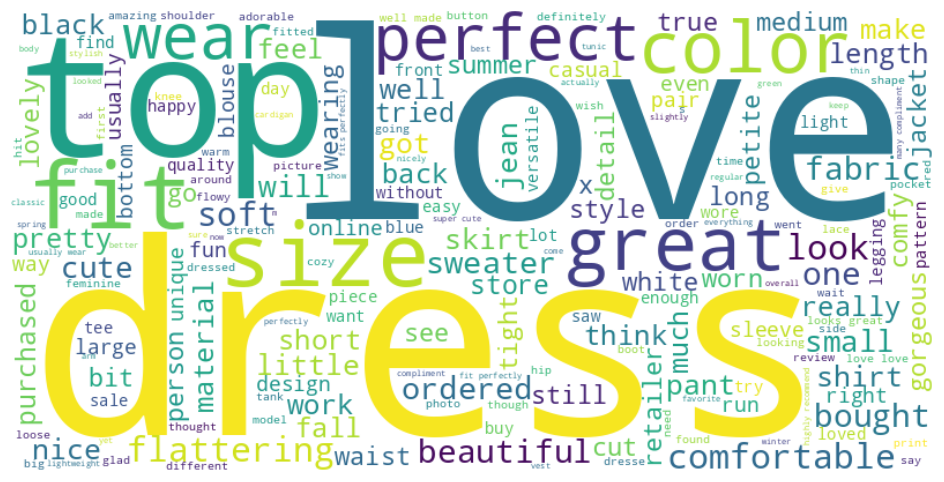

In [ ]:
from wordcloud import WordCloud

text = " ".join(train_df[train_df["Rating"] == 5]["Text"])

# Membuat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Menampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Kata Penting Apa Yang Diucapkan Antar Rating ?

In [ ]:
def find_influential_words_tfidf(df, rating, top_n=20):
    # Pra-pemrosesan teks
    df_filtered = df[df['Rating'] == rating]
    df_filtered['Text'] = df_filtered['Text'].apply(preprocess_text)

    # TF-IDF Vectorization
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(df_filtered['Text'])

    # Ambil nama fitur (kata-kata)
    feature_names = vectorizer.get_feature_names_out()

    # Hitung nilai rata-rata TF-IDF untuk setiap fitur (kata)
    tfidf_means = X.mean(axis=0).tolist()[0]

    # Gabungkan nama fitur dan nilai TF-IDF
    word_tfidf = dict(zip(feature_names, tfidf_means))

    # Ambil kata-kata dengan nilai TF-IDF tertinggi (misalnya top 20)
    influential_words = sorted(word_tfidf.items(), key=lambda x: x[1], reverse=True)[:top_n]

    return influential_words

In [ ]:
rating = 1
influential_words_tfidf = find_influential_words_tfidf(train_df, rating, top_n=50)
print(f"Kata berpengaruh untuk rating '{rating}':")
for word, tfidf_score in influential_words_tfidf:
    print(f"{word}: {tfidf_score}")

Kata berpengaruh untuk rating '1':
the: 0.1308209071513261
it: 0.08671357855810047
and: 0.07070102984034796
is: 0.06677919622305384
not: 0.050823630739535976
this: 0.050769685770262044
was: 0.04940725936089408
to: 0.04763645223233746
in: 0.04480634030943849
of: 0.03838536722522794
on: 0.038275241394829414
but: 0.03809860134401713
dress: 0.03691442033558844
so: 0.03537297542178305
like: 0.031169503347418668
as: 0.02878770512637836
for: 0.028769306256776293
very: 0.02835521127134253
top: 0.027091043168205372
fit: 0.025903717724766975
fabric: 0.025867679317705936
too: 0.02533509028598659
that: 0.025123049259878846
my: 0.024884770777759822
have: 0.023281438673657184
at: 0.023142552250852284
are: 0.022904260963423465
me: 0.02135379504343581
be: 0.020858695699087243
size: 0.020646188494547284
material: 0.020527108532073235
they: 0.019731075542767124
you: 0.019530095795390973
looks: 0.018856948776007878
shirt: 0.018840782249917584
would: 0.018641814897230994
back: 0.01862995458169881
quality:

<ipython-input-515-6991db430722>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Text'] = df_filtered['Text'].apply(preprocess_text)


In [ ]:
rating = 2
influential_words_tfidf = find_influential_words_tfidf(train_df, rating, top_n=50)
print(f"Kata berpengaruh untuk rating '{rating}':")
for word, tfidf_score in influential_words_tfidf:
    print(f"{word}: {tfidf_score}")

Kata berpengaruh untuk rating '2':
the: 0.12933000266123792
it: 0.09422615847851758
and: 0.07403632893432255
is: 0.06251706046670097
was: 0.05490676046085806
not: 0.054751712481523225
to: 0.05399882358413471
this: 0.0494372194365042
but: 0.04531492662951516
in: 0.044826814345445117
on: 0.04131564630141668
dress: 0.03576045373923401
too: 0.03555258025825096
for: 0.0351044725181631
of: 0.03505355187381735
so: 0.032632415683894404
like: 0.03153291293886677
very: 0.030775487268532888
top: 0.03037923830056225
me: 0.029107906359850666
my: 0.027515212996402277
have: 0.02668128452147841
that: 0.026542152927450692
would: 0.026095271066990798
fabric: 0.02598656161825016
small: 0.02483524826536286
with: 0.024815703953485677
fit: 0.024766615387083805
size: 0.02438710911549591
just: 0.024274271234522946
as: 0.023930747229251627
be: 0.02337714592307542
did: 0.022408392347635444
love: 0.021422100892888853
are: 0.019954472551169916
really: 0.019819601992880364
back: 0.019718152488330247
had: 0.0194777

<ipython-input-515-6991db430722>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Text'] = df_filtered['Text'].apply(preprocess_text)


In [ ]:
rating = 3
influential_words_tfidf = find_influential_words_tfidf(train_df, rating, top_n=50)
print(f"Kata berpengaruh untuk rating '{rating}':")
for word, tfidf_score in influential_words_tfidf:
    print(f"{word}: {tfidf_score}")

<ipython-input-515-6991db430722>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Text'] = df_filtered['Text'].apply(preprocess_text)


Kata berpengaruh untuk rating '3':
the: 0.12893403862853997
it: 0.09018222641990364
and: 0.07364021035172369
is: 0.06557001557156487
not: 0.05186321891663149
to: 0.05115286082549031
but: 0.050633671006140975
was: 0.049699133238771495
this: 0.046983500656032726
in: 0.04560093444111149
on: 0.041593865650983775
for: 0.04009960084754674
dress: 0.03726233611592888
of: 0.03584395138509177
too: 0.033414153707638505
me: 0.03142753983471054
very: 0.03134910800819359
top: 0.031251407064191314
so: 0.030824942328949
my: 0.029602854087451183
like: 0.02760330650623699
fit: 0.027195766853054065
have: 0.027107378815455784
that: 0.026689317660701966
with: 0.024897446735174945
just: 0.02472139560289413
would: 0.024721310121982448
love: 0.024060633708369146
size: 0.023942025748452687
cute: 0.023900217729671505
small: 0.02359090843116766
as: 0.022708939516919116
are: 0.022503954710216257
fabric: 0.022357615474243572
be: 0.021393148626563437
did: 0.021374188152795223
really: 0.02117421653482332
you: 0.0201

In [ ]:
rating = 4
influential_words_tfidf = find_influential_words_tfidf(train_df, rating, top_n=50)
print(f"Kata berpengaruh untuk rating '{rating}':")
for word, tfidf_score in influential_words_tfidf:
    print(f"{word}: {tfidf_score}")

<ipython-input-515-6991db430722>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Text'] = df_filtered['Text'].apply(preprocess_text)


Kata berpengaruh untuk rating '4':
the: 0.1193405795544182
it: 0.08718947297148245
and: 0.07678271486878618
is: 0.0705435666305269
to: 0.048203976867174474
this: 0.044957899389778865
but: 0.04456124058126942
in: 0.04319028332856323
not: 0.040892268655667016
dress: 0.03855239193042033
for: 0.03691835892761578
on: 0.03611762423165076
was: 0.03195391625834619
top: 0.03177697565475958
of: 0.03143715933486067
with: 0.030569409819637128
very: 0.02991055979315716
that: 0.029457660094100228
size: 0.02943535730739138
so: 0.029429540565654597
great: 0.028148797240583504
my: 0.028021999245818628
cute: 0.027322384813235314
love: 0.026436029900201045
have: 0.024625835859586012
are: 0.024258508456974692
fit: 0.023604822670792523
me: 0.023116653000610075
like: 0.023051018491735832
be: 0.02246856400900426
small: 0.021964777121856165
as: 0.021883208011928768
too: 0.0214731893818436
wear: 0.021125161751041004
nice: 0.02108125669970621
little: 0.020569789839407288
beautiful: 0.020442234838563347
you: 0.0

In [ ]:
rating = 5
influential_words_tfidf = find_influential_words_tfidf(train_df, rating, top_n=50)
print(f"Kata berpengaruh untuk rating '{rating}':")
for word, tfidf_score in influential_words_tfidf:
    print(f"{word}: {tfidf_score}")

<ipython-input-515-6991db430722>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Text'] = df_filtered['Text'].apply(preprocess_text)


Kata berpengaruh untuk rating '5':
the: 0.1028684523799441
it: 0.08344664596817097
and: 0.08309846897771803
is: 0.06757584754080849
this: 0.05056327259042155
to: 0.04676809597256445
in: 0.04275995978528875
dress: 0.04062848840480642
love: 0.04062150937260193
with: 0.035375859053776444
for: 0.035176735187004815
so: 0.03463661138239898
great: 0.03415556281732837
on: 0.032376521115658835
not: 0.03215146361540934
but: 0.031802396201427205
of: 0.029782945736260925
top: 0.02938112440143934
my: 0.028272263228346715
very: 0.027720168573144105
size: 0.026490692950853167
are: 0.02494912120301448
fit: 0.02488345195503715
perfect: 0.024711364171378036
was: 0.02432527552906617
that: 0.02362154276950991
wear: 0.022958988205256273
or: 0.022142196625573186
have: 0.021583023693112758
beautiful: 0.021355068937808096
as: 0.021154385758054246
comfortable: 0.020727370230853748
they: 0.02065843882191138
be: 0.020613933494131455
flattering: 0.020172395867365668
cute: 0.019549763199229794
soft: 0.019382029710

## Generate Lexicon Score

In [ ]:
# # Contoh penggunaan untuk semua label dan penyimpanan ke dalam struktur topic_keywords
# topic_keywords = {}

# # Definisikan label dan ekstraksi kata-kata berpengaruh menggunakan TF-IDF
# labels = train_df['Rating'].unique()
# for label in labels:
#     influential_words_tfidf = find_influential_words_tfidf(train_df, label, top_n=50)
#     topic_keywords[label] = [word for word, _ in influential_words_tfidf]

In [ ]:
# # Fungsi untuk menghitung skor untuk setiap topik
# def topic_scores(text, topic_keywords):
#     words = text.split()
#     total_words = len(words)
#     scores = {}
#     for topic, keywords in topic_keywords.items():
#         keyword_count = sum(1 for word in words if word in keywords)
#         score = keyword_count / total_words if total_words > 0 else 0
#         scores[f'{topic}_score'] = score
#     return scores

In [ ]:
# # Tambahkan fitur skor untuk setiap topik
# topic_scores_train_df = train_df['Text'].apply(lambda text: pd.Series(topic_scores(text, topic_keywords)))
# topic_scores_test_df = test_df['Text'].apply(lambda text: pd.Series(topic_scores(text, topic_keywords)))

# train_df = pd.concat([train_df, topic_scores_train_df], axis=1)
# test_df = pd.concat([test_df, topic_scores_test_df], axis=1)

In [ ]:
# train_df.head()

In [ ]:
# train_df = train_df.drop(columns = ["Department Name", "Class Name", "Division Name"])
# test_df = test_df.drop(columns = ["Department Name", "Class Name", "Division Name"])

In [ ]:
X = train_df.drop(['Rating'], axis=1)
y = train_df['Rating']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11183 entries, 0 to 17610
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Text             11183 non-null  object 
 1   Title_Negative   11183 non-null  float64
 2   Title_Neutral    11183 non-null  float64
 3   Title_Positive   11183 non-null  float64
 4   Title_Compound   11183 non-null  float64
 5   Review_Negative  11183 non-null  float64
 6   Review_Neutral   11183 non-null  float64
 7   Review_Positive  11183 non-null  float64
 8   Review_Compound  11183 non-null  float64
 9   Text Length      11183 non-null  int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 961.0+ KB


In [ ]:
y.info()

<class 'pandas.core.series.Series'>
Index: 11183 entries, 0 to 17610
Series name: Rating
Non-Null Count  Dtype
--------------  -----
11183 non-null  int64
dtypes: int64(1)
memory usage: 174.7 KB


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)

In [ ]:
y_train = y_train - 1
y_test = y_test - 1

y_train = y_train.astype(int)
y_test = y_test.astype(int)

y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
X_train

,Text,Title_Negative,Title_Neutral,Title_Positive,Title_Compound,Review_Negative,Review_Neutral,Review_Positive,Review_Compound,Text Length
3758,"lovely dress, small top, different color. like...",0.0,0.417,0.583,0.6808,0.043,0.769,0.187,0.9441,115
17082,love these pants!.,0.0,0.308,0.692,0.6696,0.000,0.000,0.000,0.0000,3
16856,beautiful. i ordered the copper in a medium wh...,0.0,0.000,1.000,0.5994,0.025,0.920,0.056,0.4285,97
10707,easy everyday dress!. just bought this in navy...,0.0,0.385,0.615,0.4926,0.063,0.868,0.069,0.3685,98
4145,love this dress!. i got this in blue and i lov...,0.0,0.308,0.692,0.6696,0.045,0.724,0.232,0.9620,91
...,...,...,...,...,...,...,...,...,...,...
3936,tla t shirt. this is better than the original ...,0.0,1.000,0.000,0.0000,0.000,0.507,0.493,0.9611,31
4254,beautiful dress. i was so excited to get the d...,0.0,0.204,0.796,0.5994,0.088,0.688,0.225,0.8111,46
4201,. love the fit ! perfect for accomplishing the...,0.0,0.000,0.000,0.0000,0.000,0.771,0.229,0.7840,37
5608,awesome sweater dress!. lovely body hugging dr...,0.0,0.313,0.687,0.6588,0.000,0.663,0.337,0.9600,46


In [ ]:
y_train

array([3, 4, 3, ..., 4, 4, 4])

In [ ]:
X_train.shape

(8387, 10)

In [ ]:
y_train.shape

(8387,)

In [ ]:
max_len = train_df['Text Length'].max()
vocab_size = 1000
embedding_dim = 32
drop_value = 0.2
early_stop = EarlyStopping(monitor='val_loss', patience=15)

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, char_level=False, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train['Text'])

training_sequences = tokenizer.texts_to_sequences(X_train['Text'])
training_padded = pad_sequences(training_sequences, maxlen=max_len, padding='pre', truncating='post')
testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences, maxlen=max_len, padding='pre', truncating='post')

In [ ]:
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))
class_weight_dict

{0: 5.686101694915254,
 1: 3.027797833935018,
 2: 1.619111969111969,
 3: 0.9226622662266226,
 4: 0.3581127241673783}

In [ ]:
from tensorflow.keras.layers import Input, Embedding, SpatialDropout1D, LSTM, Dropout, Dense, Concatenate
from tensorflow.keras.models import Model, Sequential
import tensorflow as tf

In [ ]:
# LSTM Model
model1 = Sequential()
model1.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model1.add(SpatialDropout1D(drop_value))
model1.add(LSTM(64, return_sequences=False))
model1.add(Dropout(drop_value))
model1.add(Dense(5, activation='softmax'))
model1.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.AdamW(), metrics=["accuracy"])
model1.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_47 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d_29                 │ ?                           │     0 (unbuilt) │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_14 (LSTM)                       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_76 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_73 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Embedding, SpatialDropout1D, LSTM, Dropout, Dense, Concatenate
from tensorflow.keras.models import Model
import numpy as np

# Pisahkan data menjadi training dan testing
X = train_df.drop(['Rating'], axis=1)
y = train_df['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)

y_train = y_train - 1
y_test = y_test - 1

y_train = y_train.astype(int)
y_test = y_test.astype(int)

y_train = np.array(y_train)
y_test = np.array(y_test)

# Siapkan data teks
tokenizer = Tokenizer(num_words=vocab_size, char_level=False, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train['Text'])

training_sequences = tokenizer.texts_to_sequences(X_train['Text'])
training_padded = pad_sequences(training_sequences, maxlen=max_len, padding='pre', truncating='post')
testing_sequences = tokenizer.texts_to_sequences(X_test['Text'])
testing_padded = pad_sequences(testing_sequences, maxlen=max_len, padding='pre', truncating='post')

# Siapkan data numerik
X_train_numerical = X_train[['Title_Negative', 'Title_Neutral', 'Title_Positive', 'Title_Compound',
                             'Review_Negative', 'Review_Neutral', 'Review_Positive', 'Review_Compound']].values
X_test_numerical = X_test[['Title_Negative', 'Title_Neutral', 'Title_Positive', 'Title_Compound',
                           'Review_Negative', 'Review_Neutral', 'Review_Positive', 'Review_Compound']].values

# Verifikasi ukuran data input
print("Shape of training_padded:", training_padded.shape)
print("Shape of X_train_numerical:", X_train_numerical.shape)
print("Shape of y_train:", y_train.shape)

# Pastikan ukuran dari semua data input sama
assert training_padded.shape[0] == X_train_numerical.shape[0] == y_train.shape[0], "Ukuran X dan y tidak sesuai!"

# Model LSTM dengan penggabungan fitur numerik
input_text = Input(shape=(max_len,))
embedding = Embedding(vocab_size, embedding_dim, input_length=max_len)(input_text)
spatial_dropout = SpatialDropout1D(drop_value)(embedding)
lstm = LSTM(64, return_sequences=False)(spatial_dropout)
dropout = Dropout(drop_value)(lstm)

# Fitur numerik
input_numerical = Input(shape=(8,))  # 8 adalah jumlah fitur numerik

# Gabungkan output LSTM dan fitur numerik
combined = Concatenate()([dropout, input_numerical])

# Lapisan Dense dan output
dense = Dense(64, activation='relu')(combined)
output = Dense(5, activation='softmax')(dense)

# Model
model = Model(inputs=[input_text, input_numerical], outputs=output)
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.AdamW(), metrics=["accuracy"])
model.summary()

# Train model
history = model.fit([training_padded, X_train_numerical], y_train, epochs=30,
                    validation_data=([testing_padded, X_test_numerical], y_test),
                    class_weight=class_weight_dict, verbose=1, callbacks=[early_stop])

Shape of training_padded: (8387, 123)
Shape of X_train_numerical: (8387, 8)
Shape of y_train: (8387,)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_41            │ (None, 123)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_48 (Embedding)  │ (None, 123, 32)        │         32,000 │ input_layer_41[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ spatial_dropout1d_30      │ (None, 123, 32)        │              0 │ embedding_48[0][0]     │
│ (SpatialDropout1D)        │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_15 (LSTM)            │ (None, 64)             │         24,832 │ spatial_dropout1d_30[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_77 (Dropout)      │ (None, 64)             │              0 │ lstm_15[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_42            │ (None, 8)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_9             │ (None, 72)             │              0 │ dropout_77[0][0],      │
│ (Concatenate)             │                        │                │ input_layer_42[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_74 (Dense)          │ (None, 64)             │          4,672 │ concatenate_9[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_75 (Dense)          │ (None, 5)              │            325 │ dense_74[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 61,829 (241.52 KB)

 Trainable params: 61,829 (241.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.2591 - loss: 1.5164 - val_accuracy: 0.5672 - val_loss: 1.1082
Epoch 2/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5467 - loss: 1.2723 - val_accuracy: 0.5533 - val_loss: 1.0950
Epoch 3/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5581 - loss: 1.2099 - val_accuracy: 0.5347 - val_loss: 1.0749
Epoch 4/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5551 - loss: 1.1596 - val_accuracy: 0.5064 - val_loss: 1.1028
Epoch 5/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5731 - loss: 1.1043 - val_accuracy: 0.4950 - val_loss: 1.1046
Epoch 6/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.5782 - loss: 1.0327 - val_accuracy: 0.5057 - val_loss: 1.0838
Epoch 7/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5790 - loss: 0.9855 - val_accuracy: 0.5050 - val_loss: 1.1006
Epoch 8/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5915 - loss: 0.9177 - val_accur

In [ ]:
# Periksa apakah ada nilai NaN atau None
print(np.isnan(X_test_numerical).any())
print(np.isnan(testing_padded).any())

# Jika ada NaN, ganti dengan nilai default (misalnya 0) atau lakukan preprocessing
X_test_numerical = np.nan_to_num(X_test_numerical, nan=0)

(2796, 123)
(2796, 8)


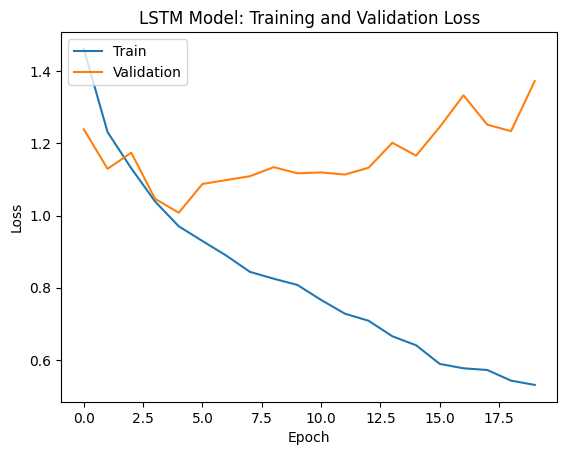

In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('LSTM Model: Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.layers import Input, Embedding, SpatialDropout1D, GRU, Dropout, Dense, Concatenate
from tensorflow.keras.models import Model

# Model GRU dengan penggabungan fitur numerik
input_text = Input(shape=(max_len,))
embedding = Embedding(vocab_size, embedding_dim, input_length=max_len)(input_text)
spatial_dropout = SpatialDropout1D(drop_value)(embedding)
gru = GRU(64, return_sequences=False)(spatial_dropout)
dropout = Dropout(drop_value)(gru)

# Fitur numerik
input_numerical = Input(shape=(8,))  # 8 adalah jumlah fitur numerik

# Gabungkan output GRU dan fitur numerik
combined = Concatenate()([dropout, input_numerical])

# Lapisan Dense dan output
dense = Dense(64, activation='relu')(combined)
output = Dense(5, activation='softmax')(dense)

# Model
model2 = Model(inputs=[input_text, input_numerical], outputs=output)
model2.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.AdamW(), metrics=["accuracy"])
model2.summary()

Model: "functional_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_43            │ (None, 123)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_49 (Embedding)  │ (None, 123, 32)        │         32,000 │ input_layer_43[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ spatial_dropout1d_31      │ (None, 123, 32)        │              0 │ embedding_49[0][0]     │
│ (SpatialDropout1D)        │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gru_15 (GRU)              │ (None, 64)             │         18,816 │ spatial_dropout1d_31[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_78 (Dropout)      │ (None, 64)             │              0 │ gru_15[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_44            │ (None, 8)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_10            │ (None, 72)             │              0 │ dropout_78[0][0],      │
│ (Concatenate)             │                        │                │ input_layer_44[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_76 (Dense)          │ (None, 64)             │          4,672 │ concatenate_10[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_77 (Dense)          │ (None, 5)              │            325 │ dense_76[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 55,813 (218.02 KB)

 Trainable params: 55,813 (218.02 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history2 = model2.fit([training_padded, X_train_numerical], y_train, epochs=30,
                    validation_data=([testing_padded, X_test_numerical], y_test),
                    class_weight=class_weight_dict, verbose=1, callbacks=[early_stop])


Epoch 1/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.4374 - loss: 1.5283 - val_accuracy: 0.5089 - val_loss: 1.2128
Epoch 2/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5232 - loss: 1.3127 - val_accuracy: 0.5279 - val_loss: 1.1049
Epoch 3/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5484 - loss: 1.2213 - val_accuracy: 0.5150 - val_loss: 1.0781
Epoch 4/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5752 - loss: 1.1455 - val_accuracy: 0.4750 - val_loss: 1.1623
Epoch 5/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5853 - loss: 1.0719 - val_accuracy: 0.5279 - val_loss: 1.0867
Epoch 6/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6009 - loss: 1.0120 - val_accuracy: 0.5308 - val_loss: 1.0863
Epoch 7/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.6143 - loss: 0.9531 - val_accuracy: 0.5354 - val_loss: 1.1164
Epoch 8/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6424 - loss: 0.8802 - val_accur

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
import numpy as np

# Gabungkan data numerik dengan data teks untuk prediksi
y_pred_prob = model2.predict([testing_padded, X_test_numerical])
y_pred_classes = np.argmax(y_pred_prob, axis=1)  # Get the predicted class

# Menampilkan classification report
print(classification_report(y_test, y_pred_classes))

# Menghitung metrik lainnya
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')  # Use weighted for multiclass
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

# Menghitung Quadratic Weighted Kappa
qwk = cohen_kappa_score(y_test, y_pred_classes, weights='quadratic')

# Menampilkan metrik secara terpisah
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'Quadratic Weighted Kappa: {qwk:.2f}')

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

           0       0.34      0.37      0.36       102
           1       0.25      0.32      0.28       182
           2       0.29      0.39      0.34       326
           3       0.31      0.49      0.38       632
           4       0.84      0.54      0.66      1554

    accuracy                           0.49      2796
   macro avg       0.41      0.43      0.40      2796
weighted avg       0.60      0.49      0.52      2796

Accuracy: 0.49
Precision: 0.60
Recall: 0.49
F1 Score: 0.52
Quadratic Weighted Kappa: 0.65


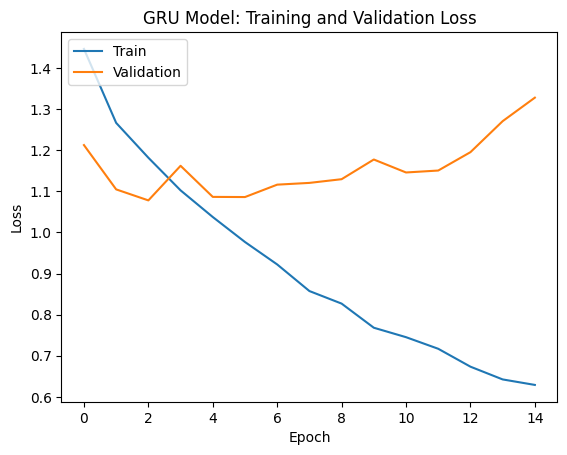

In [ ]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('GRU Model: Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.layers import Bidirectional, LSTM

# Model Bi-LSTM dengan penggabungan fitur numerik
input_text = Input(shape=(max_len,))
embedding = Embedding(vocab_size, embedding_dim, input_length=max_len)(input_text)
spatial_dropout = SpatialDropout1D(drop_value)(embedding)
bi_lstm = Bidirectional(LSTM(64, return_sequences=False))(spatial_dropout)
dropout = Dropout(drop_value)(bi_lstm)

# Fitur numerik
input_numerical = Input(shape=(8,))  # 8 adalah jumlah fitur numerik

# Gabungkan output Bi-LSTM dan fitur numerik
combined = Concatenate()([dropout, input_numerical])

# Lapisan Dense dan output
dense = Dense(64, activation='relu')(combined)
output = Dense(5, activation='softmax')(dense)

# Model
model3 = Model(inputs=[input_text, input_numerical], outputs=output)
model3.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.AdamW(), metrics=["accuracy"])
model3.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_45            │ (None, 123)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_50 (Embedding)  │ (None, 123, 32)        │         32,000 │ input_layer_45[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ spatial_dropout1d_32      │ (None, 123, 32)        │              0 │ embedding_50[0][0]     │
│ (SpatialDropout1D)        │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_14          │ (None, 128)            │         49,664 │ spatial_dropout1d_32[… │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_79 (Dropout)      │ (None, 128)            │              0 │ bidirectional_14[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_46            │ (None, 8)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_11            │ (None, 136)            │              0 │ dropout_79[0][0],      │
│ (Concatenate)             │                        │                │ input_layer_46[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_78 (Dense)          │ (None, 64)             │          8,768 │ concatenate_11[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_79 (Dense)          │ (None, 5)              │            325 │ dense_78[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 90,757 (354.52 KB)

 Trainable params: 90,757 (354.52 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history3 = model3.fit([training_padded, X_train_numerical], y_train, epochs=30,
                    validation_data=([testing_padded, X_test_numerical], y_test),
                    class_weight=class_weight_dict, verbose=1, callbacks=[early_stop])


Epoch 1/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.4429 - loss: 1.5179 - val_accuracy: 0.5390 - val_loss: 1.0756
Epoch 2/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.5322 - loss: 1.2573 - val_accuracy: 0.4932 - val_loss: 1.1410
Epoch 3/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.5511 - loss: 1.1991 - val_accuracy: 0.4996 - val_loss: 1.1056
Epoch 4/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.5506 - loss: 1.1751 - val_accuracy: 0.5072 - val_loss: 1.0854
Epoch 5/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.5592 - loss: 1.1077 - val_accuracy: 0.4481 - val_loss: 1.1779
Epoch 6/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.5813 - loss: 1.0454 - val_accuracy: 0.4567 - val_loss: 1.1585
Epoch 7/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.5823 - loss: 0.9854 - val_accuracy: 0.4785 - val_loss: 1.1311
Epoch 8/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.6089 - loss: 0.9178 - val_accu

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
import numpy as np

# Gabungkan data numerik dengan data teks untuk prediksi
y_pred_prob = model3.predict([testing_padded, X_test_numerical])
y_pred_classes = np.argmax(y_pred_prob, axis=1)  # Get the predicted class

# Menampilkan classification report
print(classification_report(y_test, y_pred_classes))

# Menghitung metrik lainnya
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')  # Use weighted for multiclass
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

# Menghitung Quadratic Weighted Kappa
qwk = cohen_kappa_score(y_test, y_pred_classes, weights='quadratic')

# Menampilkan metrik secara terpisah
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'Quadratic Weighted Kappa: {qwk:.2f}')

88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
              precision    recall  f1-score   support

           0       0.15      0.29      0.19       102
           1       0.23      0.31      0.26       182
           2       0.30      0.42      0.35       326
           3       0.34      0.39      0.36       632
           4       0.85      0.63      0.72      1554

    accuracy                           0.52      2796
   macro avg       0.37      0.41      0.38      2796
weighted avg       0.60      0.52      0.55      2796

Accuracy: 0.52
Precision: 0.60
Recall: 0.52
F1 Score: 0.55
Quadratic Weighted Kappa: 0.56


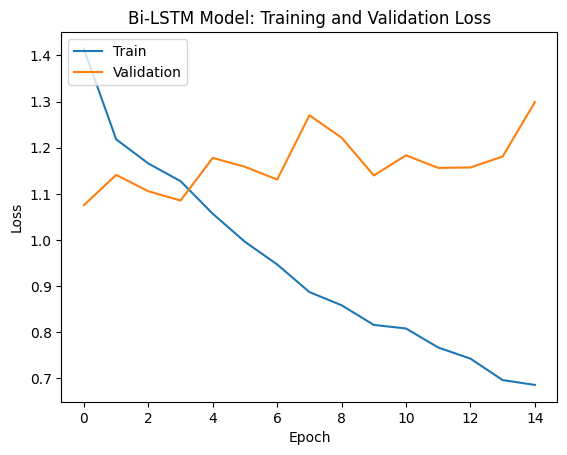

In [ ]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Bi-LSTM Model: Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Model Bi-GRU dengan penggabungan fitur numerik
input_text = Input(shape=(max_len,))
embedding = Embedding(vocab_size, embedding_dim, input_length=max_len)(input_text)
spatial_dropout = SpatialDropout1D(drop_value)(embedding)
bi_gru = Bidirectional(GRU(64, return_sequences=False))(spatial_dropout)
dropout = Dropout(drop_value)(bi_gru)

# Fitur numerik
input_numerical = Input(shape=(8,))  # 8 adalah jumlah fitur numerik

# Gabungkan output Bi-GRU dan fitur numerik
combined = Concatenate()([dropout, input_numerical])

# Lapisan Dense dan output
dense = Dense(64, activation='relu')(combined)
output = Dense(5, activation='softmax')(dense)

# Model
model4 = Model(inputs=[input_text, input_numerical], outputs=output)
model4.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.AdamW(), metrics=["accuracy"])
model4.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_47            │ (None, 123)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_51 (Embedding)  │ (None, 123, 32)        │         32,000 │ input_layer_47[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ spatial_dropout1d_33      │ (None, 123, 32)        │              0 │ embedding_51[0][0]     │
│ (SpatialDropout1D)        │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_15          │ (None, 128)            │         37,632 │ spatial_dropout1d_33[… │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_80 (Dropout)      │ (None, 128)            │              0 │ bidirectional_15[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_48            │ (None, 8)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_12            │ (None, 136)            │              0 │ dropout_80[0][0],      │
│ (Concatenate)             │                        │                │ input_layer_48[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_80 (Dense)          │ (None, 64)             │          8,768 │ concatenate_12[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_81 (Dense)          │ (None, 5)              │            325 │ dense_80[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 78,725 (307.52 KB)

 Trainable params: 78,725 (307.52 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history4 = model4.fit([training_padded, X_train_numerical], y_train, epochs=30,
                    validation_data=([testing_padded, X_test_numerical], y_test),
                    class_weight=class_weight_dict, verbose=1, callbacks=[early_stop])


Epoch 1/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.3889 - loss: 1.5272 - val_accuracy: 0.5376 - val_loss: 1.1115
Epoch 2/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.5053 - loss: 1.3077 - val_accuracy: 0.4768 - val_loss: 1.1586
Epoch 3/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.5260 - loss: 1.2316 - val_accuracy: 0.5576 - val_loss: 1.0792
Epoch 4/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.5611 - loss: 1.1713 - val_accuracy: 0.5440 - val_loss: 1.0622
Epoch 5/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.5811 - loss: 1.1072 - val_accuracy: 0.5243 - val_loss: 1.1069
Epoch 6/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.5898 - loss: 1.0268 - val_accuracy: 0.5032 - val_loss: 1.1445
Epoch 7/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.6090 - loss: 0.9478 - val_accuracy: 0.5351 - val_loss: 1.1835
Epoch 8/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.6266 - loss: 0.8809 - val_accu

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
import numpy as np

# Gabungkan data numerik dengan data teks untuk prediksi
y_pred_prob = model4.predict([testing_padded, X_test_numerical])
y_pred_classes = np.argmax(y_pred_prob, axis=1)  # Get the predicted class

# Menampilkan classification report
print(classification_report(y_test, y_pred_classes))

# Menghitung metrik lainnya
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')  # Use weighted for multiclass
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

# Menghitung Quadratic Weighted Kappa
qwk = cohen_kappa_score(y_test, y_pred_classes, weights='quadratic')

# Menampilkan metrik secara terpisah
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'Quadratic Weighted Kappa: {qwk:.2f}')

88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
              precision    recall  f1-score   support

           0       0.35      0.33      0.34       102
           1       0.24      0.33      0.28       182
           2       0.28      0.40      0.33       326
           3       0.30      0.49      0.37       632
           4       0.85      0.52      0.65      1554

    accuracy                           0.48      2796
   macro avg       0.41      0.42      0.39      2796
weighted avg       0.60      0.48      0.51      2796

Accuracy: 0.48
Precision: 0.60
Recall: 0.48
F1 Score: 0.51
Quadratic Weighted Kappa: 0.63


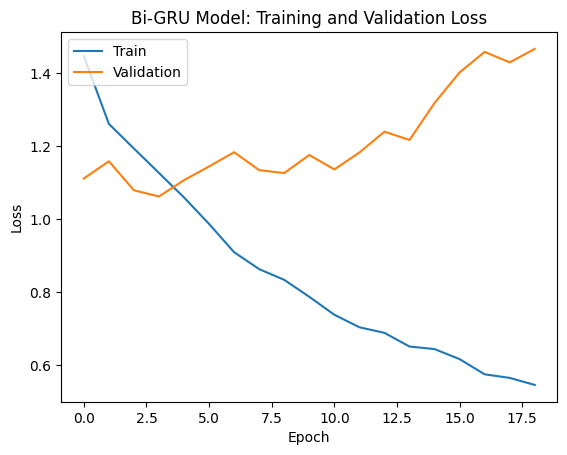

In [ ]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Bi-GRU Model: Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output)
        return self.layernorm2(out1 + ffn_output)

In [ ]:
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super().__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = ops.shape(x)[-1]
        positions = ops.arange(start=0, stop=maxlen, step=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [ ]:
vocab_size = 1000
maxlen = train_df['Text Length'].max()

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(train_df['Text'], train_df['Rating'], test_size=0.25, random_state=seed)

y_train = y_train - 1
y_test = y_test - 1

y_train = np.array(y_train)
y_test = np.array(y_test)

tokenizer = Tokenizer(num_words=vocab_size, char_level=False, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = pad_sequences(training_sequences, maxlen=max_len, padding='pre', truncating='post')
testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences, maxlen=max_len, padding='pre', truncating='post')

In [ ]:
embed_dim = 32  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed forward network inside transformer

inputs = layers.Input(shape=(max_len,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(20, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(5, activation="softmax")(x)

model5 = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
# Input untuk teks dan fitur numerik
input_text = layers.Input(shape=(max_len,))
input_numerical = layers.Input(shape=(8,))  # 8 adalah jumlah fitur numerik

# Embedding layer
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
x = embedding_layer(input_text)

# Transformer block
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)

# Global pooling dan dropout
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.1)(x)

# Gabungkan dengan fitur numerik
x = layers.Concatenate()([x, input_numerical])

# Dense layers
x = layers.Dense(20, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(5, activation="softmax")(x)

# Model
model5 = keras.Model(inputs=[input_text, input_numerical], outputs=outputs)

In [ ]:
model5.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.AdamW(), metrics=["accuracy"])

# Melakukan pelatihan model
history5 = model5.fit(
    [training_padded, X_train_numerical], y_train,
    batch_size=32, epochs=15,
    validation_data=([testing_padded, X_test_numerical], y_test),
    class_weight=class_weight_dict,
    verbose=1, callbacks=[early_stop]
)

Epoch 1/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 17s 31ms/step - accuracy: 0.3261 - loss: 1.5823 - val_accuracy: 0.1588 - val_loss: 1.8560
Epoch 2/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4922 - loss: 1.3355 - val_accuracy: 0.5526 - val_loss: 1.0700
Epoch 3/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5555 - loss: 1.1937 - val_accuracy: 0.5404 - val_loss: 1.0317
Epoch 4/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5875 - loss: 1.0913 - val_accuracy: 0.5504 - val_loss: 1.0205
Epoch 5/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6047 - loss: 1.0049 - val_accuracy: 0.5694 - val_loss: 1.0173
Epoch 6/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6067 - loss: 0.9521 - val_accuracy: 0.5165 - val_loss: 1.0955
Epoch 7/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6093 - loss: 0.9072 - val_accuracy: 0.5436 - val_loss: 1.0989
Epoch 8/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6235 - loss: 0.8520 - val_accuracy: 

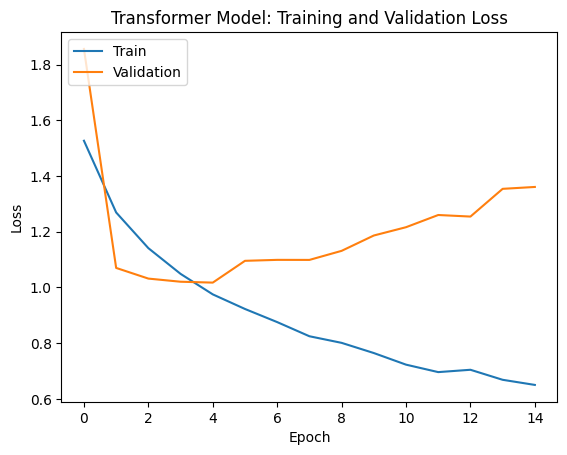

In [ ]:
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('Transformer Model: Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Melakukan prediksi
y_pred_prob = model5.predict([testing_padded, X_test_numerical])
y_pred_classes = np.argmax(y_pred_prob, axis=1)  # Mendapatkan kelas yang diprediksi

# Menampilkan classification report
print(classification_report(y_test, y_pred_classes))

# Menghitung metrik lainnya
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

# Menghitung Quadratic Weighted Kappa
qwk = cohen_kappa_score(y_test, y_pred_classes, weights='quadratic')

# Menampilkan metrik secara terpisah
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'Quadratic Weighted Kappa: {qwk:.2f}')

88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
              precision    recall  f1-score   support

           0       0.29      0.38      0.33       102
           1       0.26      0.41      0.32       182
           2       0.35      0.33      0.34       326
           3       0.36      0.45      0.40       632
           4       0.82      0.68      0.74      1554

    accuracy                           0.56      2796
   macro avg       0.42      0.45      0.43      2796
weighted avg       0.61      0.56      0.58      2796

Accuracy: 0.56
Precision: 0.61
Recall: 0.56
F1 Score: 0.58
Quadratic Weighted Kappa: 0.66


In [ ]:
X = train_df.drop(['Rating'], axis=1)
y = train_df['Rating']

tokenizer = Tokenizer(num_words=vocab_size, char_level=False, oov_token='<OOV>')
tokenizer.fit_on_texts(X)

X_sequences = tokenizer.texts_to_sequences(X)
X_padded = pad_sequences(X_sequences, maxlen=max_len, padding='pre', truncating='post')

y_train = y_train - 1
y_test = y_test - 1

y_train = y_train.astype(int)
y_test = y_test.astype(int)

y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
model5.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.AdamW(), metrics=["accuracy"])
history5 = model5.fit(
    X_train_padded, y_train, batch_size=32, epochs=15, validation_data=(X_test_padded, y_test), class_weight=class_weight_dict, verbose=1, callbacks=[early_stop]
)

In [ ]:
# Tokenization dan Padding untuk data pelatihan
tokenizer = Tokenizer(num_words=vocab_size, char_level=False, oov_token='<OOV>')
tokenizer.fit_on_texts(train_df['Text'])

X_sequences = tokenizer.texts_to_sequences(train_df['Text'])
X_padded = pad_sequences(X_sequences, maxlen=max_len, padding='pre', truncating='post')

# Fitur numerik
X_numerical = train_df[['Title_Negative', 'Title_Neutral', 'Title_Positive', 'Title_Compound',
                        'Review_Negative', 'Review_Neutral', 'Review_Positive', 'Review_Compound']].values

# Label
y = train_df['Rating'] - 1  # Pastikan label dimulai dari 0
y = y.astype(int)
y = np.array(y)

from tensorflow.keras import layers, models

# Model Bi-GRU dengan fitur numerik
input_text = layers.Input(shape=(max_len,))
input_numerical = layers.Input(shape=(8,))  # 8 adalah jumlah fitur numerik

# Embedding dan Bi-GRU
embedding_layer = layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len)
x = embedding_layer(input_text)
x = layers.SpatialDropout1D(drop_value)(x)
x = layers.Bidirectional(layers.GRU(64, return_sequences=False))(x)
x = layers.Dropout(drop_value)(x)

# Gabungkan dengan fitur numerik
combined = layers.Concatenate()([x, input_numerical])

# Dense layers
x = layers.Dense(64, activation='relu')(combined)
x = layers.Dropout(drop_value)(x)
outputs = layers.Dense(5, activation='softmax')(x)

# Model
model4 = models.Model(inputs=[input_text, input_numerical], outputs=outputs)

# Compile model
model4.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.AdamW(), metrics=["accuracy"])

# Melakukan pelatihan pada seluruh data dengan fitur numerik
history4 = model4.fit(
    [X_padded, X_numerical], y,
    batch_size=32, epochs=30,
    class_weight=class_weight_dict,
    verbose=1, callbacks=[early_stop]
)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


350/350 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.3987 - loss: 1.5213
Epoch 2/30


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


350/350 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.4897 - loss: 1.2651
Epoch 3/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5336 - loss: 1.1632
Epoch 4/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.5689 - loss: 1.0916
Epoch 5/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.5783 - loss: 1.0422
Epoch 6/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.6002 - loss: 0.9867
Epoch 7/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6184 - loss: 0.9358
Epoch 8/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.6363 - loss: 0.8960
Epoch 9/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.6532 - loss: 0.8507
Epoch 10/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.6514 - loss: 0.8282
Epoch 11/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.6564 - loss: 0.7970
Epoch 12/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.6704 - loss: 0.7684
Epoch 13/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/s

In [ ]:
# Tokenization dan Padding untuk data uji
X_test_sequences = tokenizer.texts_to_sequences(test_df['Text'])
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_len, padding='pre', truncating='post')

# Fitur numerik untuk data uji
X_test_numerical = test_df[['Title_Negative', 'Title_Neutral', 'Title_Positive', 'Title_Compound',
                            'Review_Negative', 'Review_Neutral', 'Review_Positive', 'Review_Compound']].values

# Melakukan prediksi dengan model4 (Bi-GRU) pada data uji
predictions = model4.predict([X_test_padded, X_test_numerical], batch_size=32)

# Mendapatkan kelas yang diprediksi
predicted_classes = np.argmax(predictions, axis=1)
predicted_classes += 1  # Menambahkan 1 untuk menyesuaikan dengan label yang dimulai dari 1
predicted_classes = predicted_classes.astype(int)

184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [ ]:
predicted_classes.shape

(5872,)

In [ ]:
# Membuat DataFrame untuk pengiriman
submission_df = pd.DataFrame({
    'ID': pd.Series([i for i in range(0, 5872)]),
    'Rating': predicted_classes
})

# Menampilkan DataFrame submission
submission_df

,ID,Rating
0,0,5
1,1,5
2,2,5
3,3,5
4,4,2
...,...,...
5867,5867,5
5868,5868,5
5869,5869,5
5870,5870,3


In [ ]:
submission_df.to_csv('submission_gataungasal.csv', index=False)